In [1]:
%pip install -U layoutparser

     ---------------------------------------- 19.2/19.2 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 42.2/42.2 KB 695.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31550 sha256=e3692eb8315a9a4a7c650385f9baf7b003c8cf09145013b4f0017b32536a1bcf
  Stored in directory: c:\users\pwayk\appdata\local\pip\cache\wheels\c1\13\6d\441d8f2af76ee6d2a3e67eebb1d0c556fefcee0a8b32266a8e
Successfully built iopath


In [13]:
%pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2' 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2'"
Hint: = is not a valid operator. Did you mean == ?
You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [14]:
%pip install layoutparser[ocr]     

You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
%git clone https://github.com/Layout-Parser/layout-parser.git

UsageError: Line magic function `%git` not found.


In [16]:
%cd layout-parser/

[WinError 2] The system cannot find the file specified: 'layout-parser/'
e:\CODING PLAYGROUND\CODE\HCL


In [17]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("Injection_Molding_Design_Guidelines_2017_images\out0.jpg")
image = image[..., ::-1] 
cv2.imshow("img" ,image)
cv2.waitKey(0)

#/content/Injection (1).jpg

-1

In [19]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

AttributeError: module layoutparser has no attribute Detectron2LayoutModel

In [ ]:
len(layout)

17

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=648.3465576171875, y_1=760.9888305664062, x_2=1196.981689453125, y_2=895.5393676757812), text=None, id=None, type=Text, parent=None, next=None, score=0.9917347431182861), TextBlock(block=Rectangle(x_1=72.9081039428711, y_1=1349.9010009765625, x_2=627.0158081054688, y_2=1484.9842529296875), text=None, id=None, type=Text, parent=None, next=None, score=0.9871968030929565), TextBlock(block=Rectangle(x_1=70.4671859741211, y_1=864.5009765625, x_2=625.531982421875, y_2=944.545654296875), text=None, id=None, type=Text, parent=None, next=None, score=0.9801353812217712), TextBlock(block=Rectangle(x_1=72.3414077758789, y_1=334.1598815917969, x_2=627.02392578125, y_2=444.1124267578125), text=None, id=None, type=Text, parent=None, next=None, score=0.9793399572372437), TextBlock(block=Rectangle(x_1=186.9816436767578, y_1=736.325927734375, x_2=514.1259765625, y_2=762.1716918945312), text=None, id=None, type=Text, parent=None, next=None, score=0.9764700531

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
figure_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=659.3886108398438, y_1=927.3478393554688, x_2=1191.30712890625, y_2=1221.58056640625), text=None, id=None, type=Figure, parent=None, next=None, score=0.9902352690696716), TextBlock(block=Rectangle(x_1=99.68789672851562, y_1=1010.4266967773438, x_2=573.2837524414062, y_2=1224.2091064453125), text=None, id=None, type=Figure, parent=None, next=None, score=0.9633303284645081), TextBlock(block=Rectangle(x_1=658.3531494140625, y_1=293.0783386230469, x_2=1188.0040283203125, y_2=550.2855224609375), text=None, id=None, type=Figure, parent=None, next=None, score=0.9518981575965881), TextBlock(block=Rectangle(x_1=161.24325561523438, y_1=482.84063720703125, x_2=593.0040893554688, y_2=728.5691528320312), text=None, id=None, type=Figure, parent=None, next=None, score=0.9425595998764038)], page_data={})

In [ ]:

text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

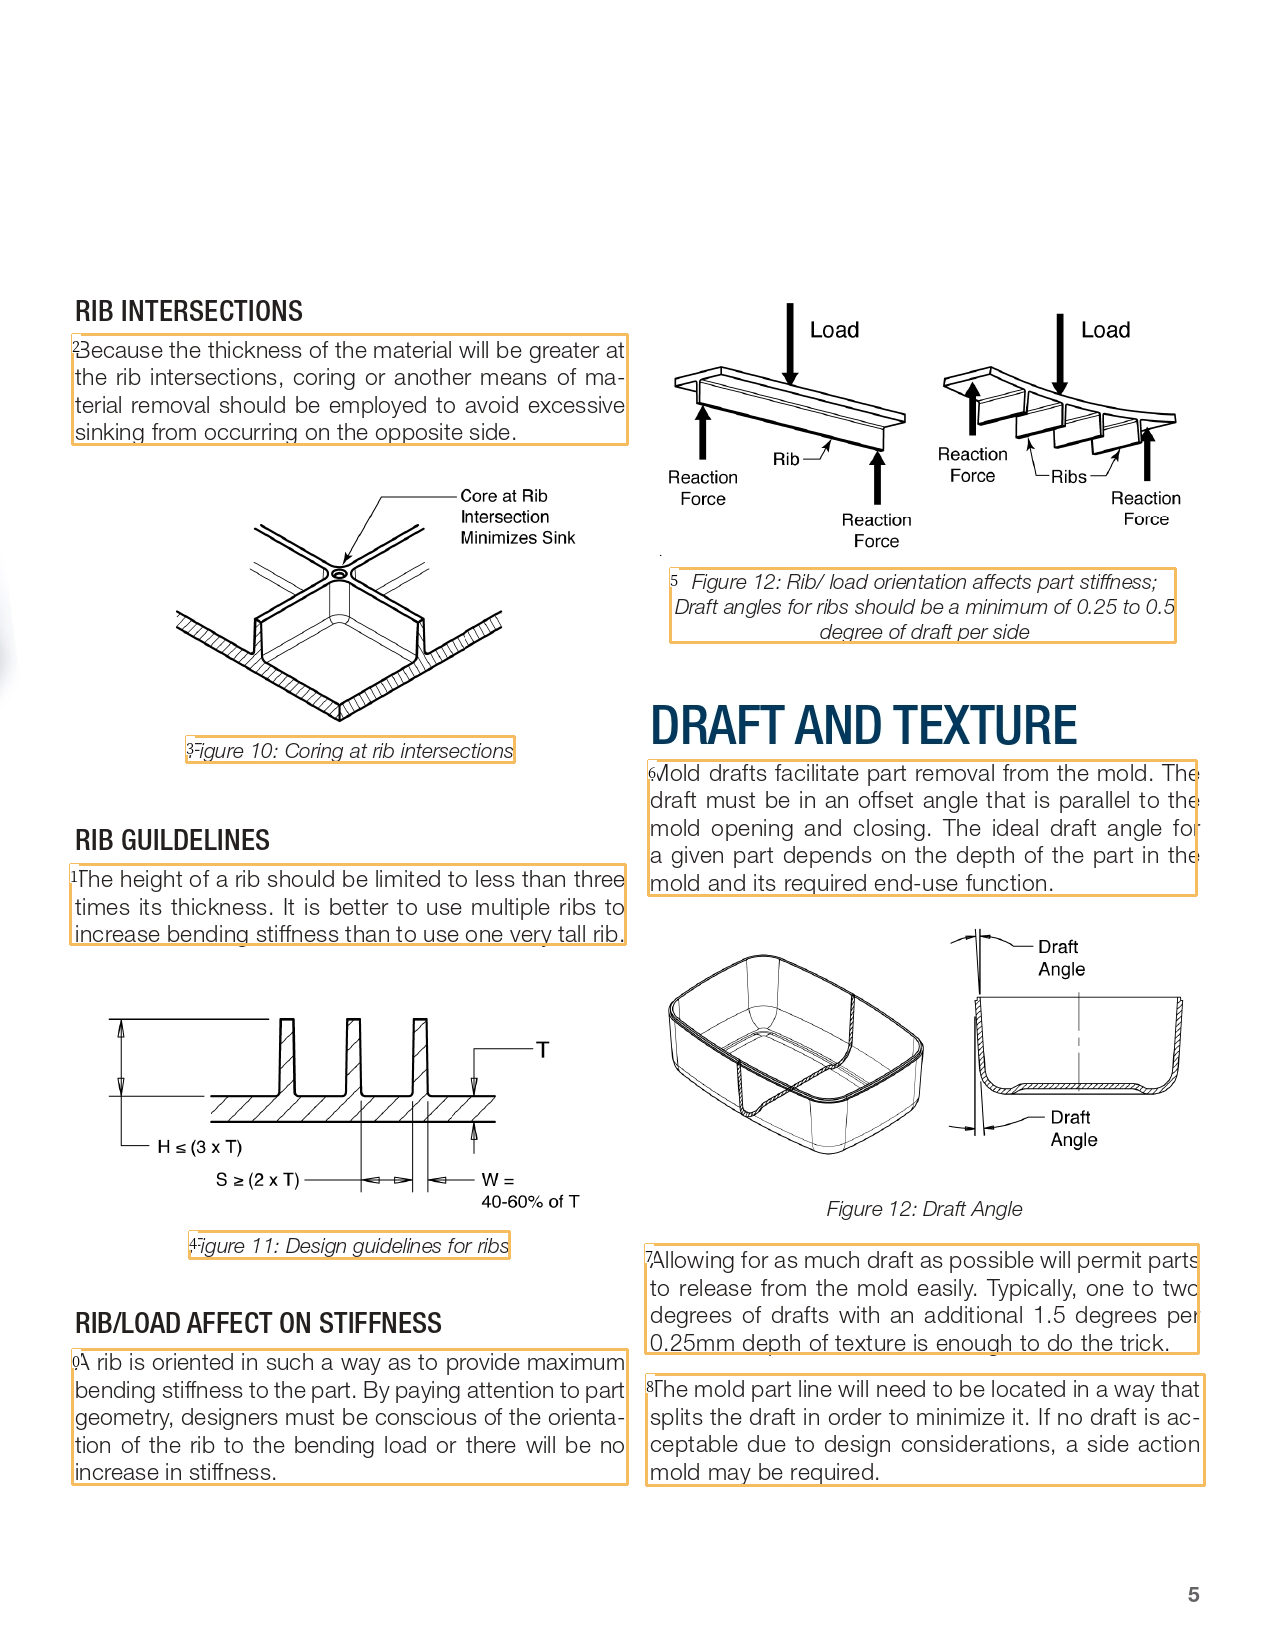

In [ ]:

lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 62 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,322 kB/s)
debconf: unable to initi

In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
text_list = []
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')
    text_list.append(txt)

A rib is oriented in such a way as to provide maximum
bending stiffness to the part. By paying attention to part
geometry, designers must be conscious of the orienta-
tion of the rib to the bending load or there will be no
increase in stiffness.

---
The height of a rib should be limited to less than three
times its thickness. It is better to use multiple ribs to
increase bending stiffness than to use one very tall rib.

---
Because the thickness of the material will be greater at
the rib intersections, coring or another means of ma-
terial removal should be employed to avoid excessive
sinking from occurring on the opposite side.

---
Figure 10: Coring at rib intersections

---
Figure 11: Design guidelines for ribs

---
Figure 12: Rib/ load orientation affects part stiffness;
Draft angles for ribs should be a minimum of 0.25 to 0.5
degree of draft per side

---
Mold drafts facilitate part removal from the mold. The
draft must be in an offset angle that is parallel to the
mold ope

In [ ]:
text_list[0]

In [ ]:
len(text_list)

In [ ]:
text_list

###Titles Extraction into List


In [ ]:
title_blocks = lp.Layout([b for b in layout if b.type=='Title'])

h_1, w_1 = image.shape[:2]

left_interval_1 = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks_1 = title_blocks.filter_by(left_interval_1, center=True)
left_blocks_1.sort(key = lambda b:b.coordinates[1], inplace=True)

right_blocks_1 = [b for b in title_blocks if b not in left_blocks_1]
right_blocks_1.sort(key = lambda b:b.coordinates[1])
# And finally combine the two list and add the index
# according to the order
title_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks_1 + right_blocks_1)])

lp.draw_box(image, title_blocks,
            box_width=3,
            show_element_id=True)
for block in title_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text_1 = ocr_agent.detect(segment_image)
    block.set(text=text_1, inplace=True)

title_list = []
for txt in title_blocks.get_texts():
    print(txt, end='\n---\n')
    title_list.append(txt)

print(title_list)

RIB INTERSECTIONS

---
RIB GUILDELINES

---
RIB/LOAD AFFECT ON STIFFNESS

---
DRAFT AND TEXTURE

---
['RIB INTERSECTIONS\n\x0c', 'RIB GUILDELINES\n\x0c', 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c', 'DRAFT AND TEXTURE\n\x0c']


In [ ]:
title_list

['RIB INTERSECTIONS\n\x0c',
 'RIB GUILDELINES\n\x0c',
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
 'DRAFT AND TEXTURE\n\x0c']

In [ ]:
title_blocks[0]

TextBlock(block=Rectangle(x_1=76.74003601074219, y_1=290.5187683105469, x_2=303.3755187988281, y_2=327.1947326660156), text=RIB INTERSECTIONS

, id=0, type=Title, parent=None, next=None, score=0.9743063449859619)

In [ ]:
title_blocks[1]

TextBlock(block=Rectangle(x_1=75.00328063964844, y_1=820.4400024414062, x_2=270.156982421875, y_2=857.1689453125), text=RIB GUILDELINES

, id=1, type=Title, parent=None, next=None, score=0.9905503988265991)

In [ ]:
title_blocks[2]

In [ ]:
img_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

h_2, w_2 = image.shape[:2]

left_interval_2 = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks_2 = img_blocks.filter_by(left_interval_1, center=True)
left_blocks_2.sort(key = lambda b:b.coordinates[1], inplace=True)

right_blocks_2 = [b for b in img_blocks if b not in left_blocks_2]
right_blocks_2.sort(key = lambda b:b.coordinates[1])
# And finally combine the two list and add the index
# according to the order
img_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks_2 + right_blocks_2)])

lp.draw_box(image, img_blocks,
            box_width=3,
            show_element_id=True)
for block in img_blocks:
    segment_image_2 = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text_2 = ocr_agent.detect(segment_image_2)
    block.set(text=text_2, inplace=True)

img_list = []
for txt in img_blocks.get_texts():
    print(txt, end='\n---\n')
    img_list.append(txt)

print(img_list)

Core at Rib
Intersection
Minimizes Sink

    

\)

---
4

 

 

 

— H<(3xT)

 

 

S$ 2(2xT)

 

[
Ct

40-60% of T

---
   

  

Rib Reaction iw
Reaction Force Ribs

Force Reaction
Reaction Force
Force

---
 

 

Figure 12: Draft Angle

---
['Core at Rib\nIntersection\nMinimizes Sink\n\n    \n\n\\)\n\x0c', '4\n\n \n\n \n\n \n\n— H<(3xT)\n\n \n\n \n\nS$ 2(2xT)\n\n \n\n[\nCt\n\n40-60% of T\n\x0c', '   \n\n  \n\nRib Reaction iw\nReaction Force Ribs\n\nForce Reaction\nReaction Force\nForce\n\x0c', ' \n\n \n\nFigure 12: Draft Angle\n\x0c']


###Extraction of Title and Paragraph 

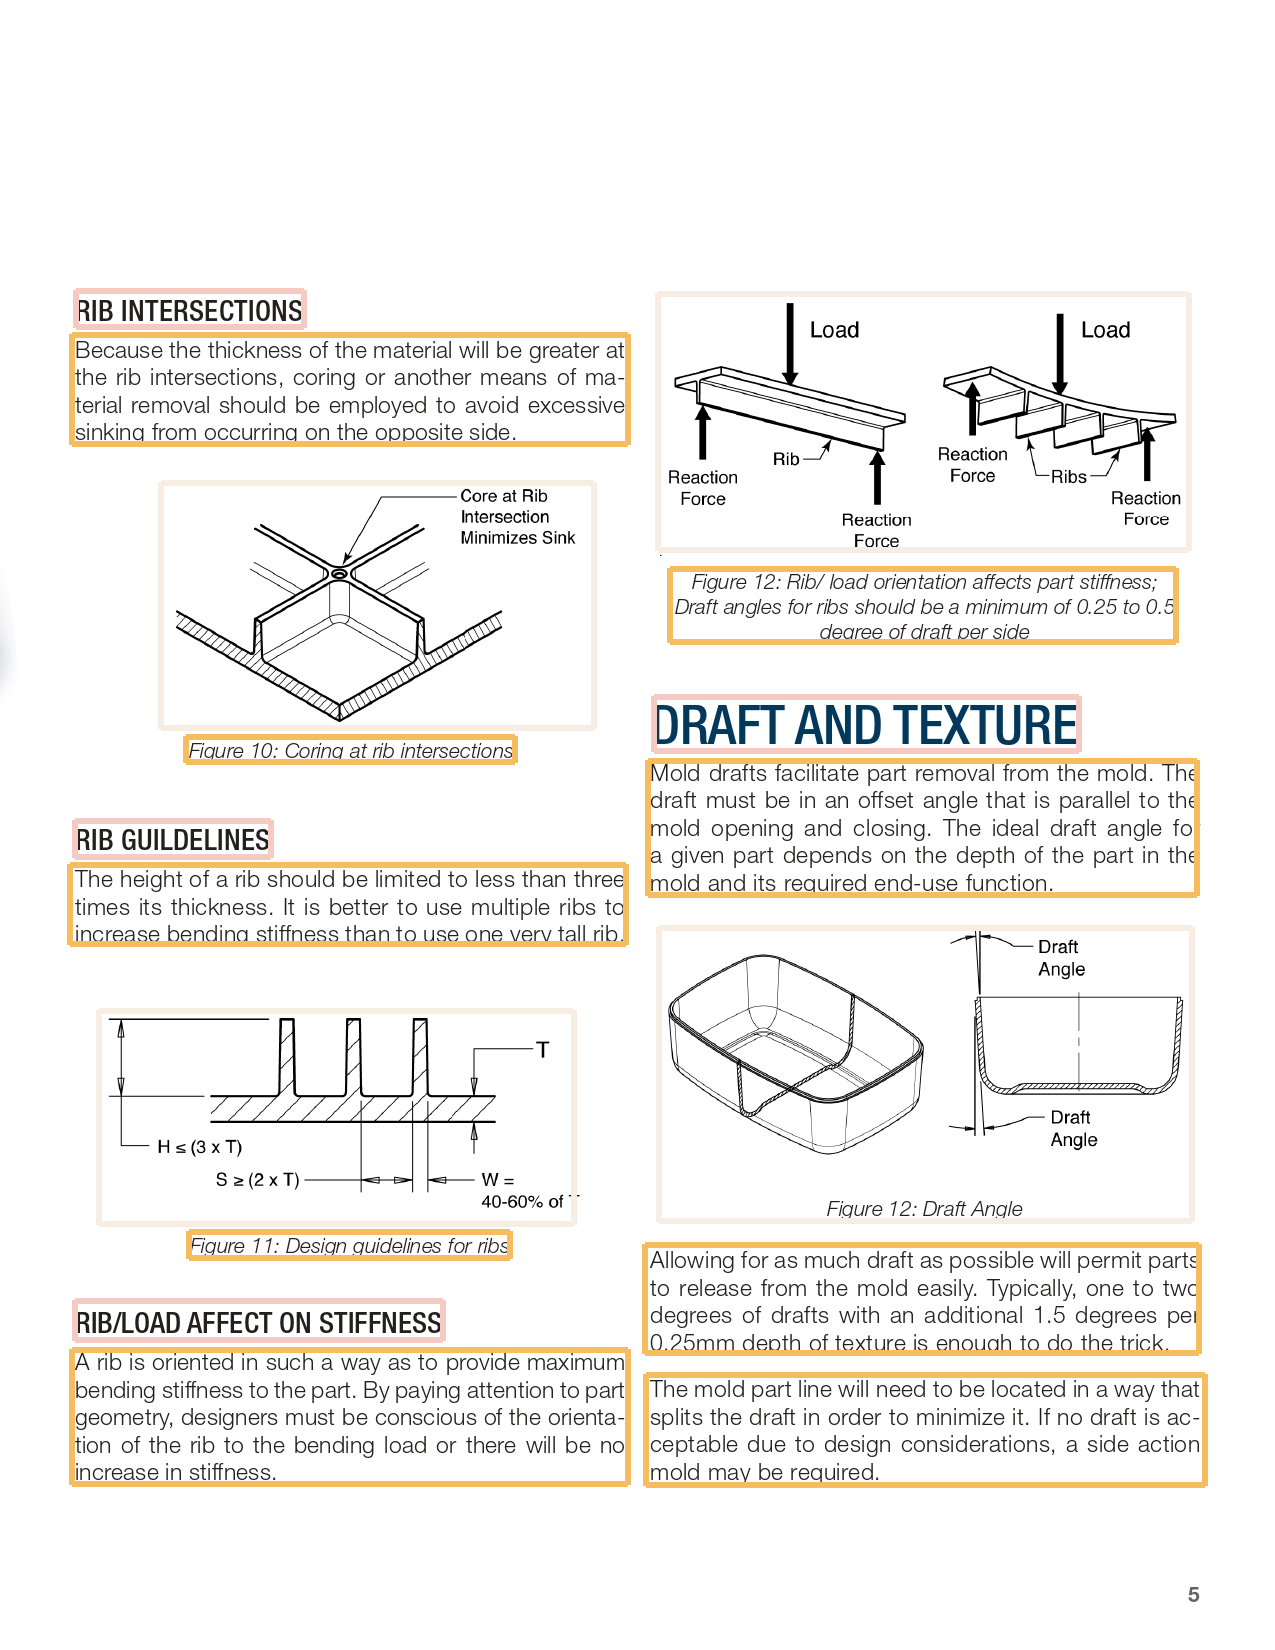

In [ ]:
lp.draw_box(image, layout,)

In [ ]:
len(layout)

17

In [ ]:
len(para_title_blocks)

NameError: ignored

In [ ]:
para_title_blocks = lp.Layout([b for b in layout])

h_2, w_2 = image.shape[:2]

left_interval_2 = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks_2 = para_title_blocks.filter_by(left_interval_2, center=True)
left_blocks_2.sort(key = lambda b:b.coordinates[1], inplace=True)

right_blocks_2 = [b for b in para_title_blocks if b not in left_blocks_2]
right_blocks_2.sort(key = lambda b:b.coordinates[1])
# And finally combine the two list and add the index
# according to the order
para_title_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks_2 + right_blocks_2)])

lp.draw_box(image, para_title_blocks,
            box_width=3,
            show_element_id=True)
for block in para_title_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text_2 = ocr_agent.detect(segment_image)
    block.set(text=text_2, inplace=True)

para_title_list = []
for txt in para_title_blocks.get_texts():
    print(txt, end='\n---\n')
    para_title_list.append(txt)

print(para_title_list)

RIB INTERSECTIONS

---
Because the thickness of the material will be greater at
the rib intersections, coring or another means of ma-
terial removal should be employed to avoid excessive
sinking from occurring on the opposite side.

---
Core at Rib
Intersection
Minimizes Sink

    

\)

---
Figure 10: Coring at rib intersections

---
RIB GUILDELINES

---
The height of a rib should be limited to less than three
times its thickness. It is better to use multiple ribs to
increase bending stiffness than to use one very tall rib.

---
4

 

 

 

— H<(3xT)

 

 

S$ 2(2xT)

 

[
Ct

40-60% of T

---
Figure 11: Design guidelines for ribs

---
RIB/LOAD AFFECT ON STIFFNESS

---
A rib is oriented in such a way as to provide maximum
bending stiffness to the part. By paying attention to part
geometry, designers must be conscious of the orienta-
tion of the rib to the bending load or there will be no
increase in stiffness.

---
   

  

Rib Reaction iw
Reaction Force Ribs

Force Reaction


In [ ]:
len(para_title_list)

17

In [ ]:
para_title_list[2]

'Core at Rib\nIntersection\nMinimizes Sink\n\n    \n\n\\)\n\x0c'

In [ ]:
type(title_blocks)

#### KeyBERT

In [ ]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.5 MB/s 
     |████████████████████████████████| 232 kB 59.7 MB/s 
     |████████████████████████████████| 51 kB 8.7 MB/s 
     |████████████████████████████████| 4.4 MB 61.4 MB/s 
     |████████████████████████████████| 1.2 MB 57.3 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.7 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=f9bdbbd436d902a427261c563dc360b08ccdd7c7d721bbc215ba1163db5cab61
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d3ca9270425e3e8cb6fcf18a5661ef043c78e18b85ded246f6a4ae535f6ad000
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()
#length=len(text_list)
keyword_list=[]
for i in text_list:
  #keywords = kw_model.extract_keywords(i)
  keywords =kw_model.extract_keywords(i, keyphrase_ngram_range=(1, 2), stop_words=None)

  #print(keywords)
  keyword_list.append(keywords)

print(keyword_list[1])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[('tall rib', 0.6658), ('multiple ribs', 0.6129), ('of rib', 0.5767), ('rib should', 0.548), ('rib', 0.5413)]


In [ ]:

doc= """Cost savings are highest when components have a
‘mini-mum wall thicknass, as long as that thickness is
con-sistent with the part's function and meets all mold
filing considerations. As would be expected, parts cool
faster with thin wall thicknesses, which means that
cycle times are shorter, resulting in more parts per hour.
Further, thin parts weigh less, using less plastic per part.
‘On average, the wall thickness of an injection molded
part ranges from 2mm to 4mm (080 inch to .160
inch). Thin wall injection molding can produce walls
as thin as 05mm (.020 inch)"""
keywords2=kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words='english', diversity=0.5,top_n=10)
print(keywords2)


[('thickness', 0.4708), ('thicknesses', 0.4535), ('molding', 0.3806), ('thicknass', 0.3548), ('2mm', 0.3282), ('mold', 0.3194), ('4mm', 0.3165), ('inch', 0.299), ('05mm', 0.2956), ('walls', 0.2719)]


In [ ]:
doc="""Parts with walls of uniform thickness allow the mold
cavity to fill more easily since the motten plastic
does not have to be forced through varying
restrictions as it fils. If the walls are not uniform the thin section cools
first, then as the thick section cools and shrinks it
‘builds stresses near the boundary area between the
‘two. Be-cause the thin section has already hardened,
it doesn't yield, As the thick section yields, it leads to
warping or twisting of the part, which, if severe
‘enough, can cause cracks"""

keywords3=kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None, diversity=0.1,top_n=10,use_mmr=True,seed_keywords=title_list, use_maxsum=True, nr_candidates=20)
print(keywords3)

In [ ]:
doc2="""Troublesome shrinkage problems can be caused by the intersection of walls that are not uniform in wall thickness. Examples might include ribs, bosses, or any other projection of the nominal wall. Since thicker walls solidify slower, the area they are attached to at the nominal wall will shrink as the projection shrinks. This can result in a sunken area in the nominal wall. Such shrinkage can be minimized if a rib thickness is maintained to between 50 and 60 percent of the walls they are attached"""
keywords4=kw_model.extract_keywords(doc2, keyphrase_ngram_range=(1, 1), stop_words=None, diversity=0.1,seed_keywords=title_list,top_n=20,use_mmr=True, use_maxsum=True, nr_candidates=20)
print(keywords4)



In [ ]:
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal).
         A supervised learning algorithm analyzes the training data and produces an inferred function,
         which can be used for mapping new examples. An optimal scenario will allow for the
         algorithm to correctly determine the class labels for unseen instances. This requires
         the learning algorithm to generalize from the training data to unseen situations in a
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None, diversity=0.1,top_n=20,use_mmr=True,seed_keywords=title_list, use_maxsum=True, nr_candidates=20)
print(keywords)

[('supervised', 0.6421), ('labeled', 0.4824), ('learning', 0.4565), ('training', 0.4221), ('labels', 0.4057), ('supervisory', 0.3145), ('data', 0.296), ('algorithm', 0.2819), ('machine', 0.2763), ('inductive', 0.2562), ('class', 0.2737), ('function', 0.2527), ('task', 0.2668), ('determine', 0.2598), ('bias', 0.2498), ('analyzes', 0.2569), ('examples', 0.2521), ('object', 0.2675), ('inferred', 0.2451), ('output', 0.2462)]


In [ ]:
#########################

In [ ]:
#text_blocks.get_texts()
print(text_list)

['A rib is oriented in such a way as to provide maximum\nbending stiffness to the part. By paying attention to part\ngeometry, designers must be conscious of the orienta-\ntion of the rib to the bending load or there will be no\nincrease in stiffness.\n\x0c', 'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c', 'Because the thickness of the material will be greater at\nthe rib intersections, coring or another means of ma-\nterial removal should be employed to avoid excessive\nsinking from occurring on the opposite side.\n\x0c', 'Figure 10: Coring at rib intersections\n\x0c', 'Figure 11: Design guidelines for ribs\n\x0c', 'Figure 12: Rib/ load orientation affects part stiffness;\nDraft angles for ribs should be a minimum of 0.25 to 0.5\ndegree of draft per side\n\x0c', 'Mold drafts facilitate part removal from the mold. The\ndraft must be in an offset angle 

In [ ]:
for block in text_blocks:
  print(block)

In [ ]:
!pip install spacy

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

In [ ]:
!pip install click==7.1.1

In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")


OSError: ignored

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)  

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

In [ ]:
#################################

In [ ]:
Caption = ['Figure 1:Uniform wall thickness can reduce or eliminate warping',' Figure 2: Transition of wall thickness','Figure 3: Coring to eliminate sinks','Figure 4: Gusseting to reduce warping','Figure 5: Boss design to eliminate sinks','Figure 6: Warpage caused by non-uniform wall thickness','Figure 7: Boss design guidelines']

In [ ]:
len(Caption)

In [ ]:
### Paragraph till fig 8
para_cap = ['Parts with walls of uniform thickness allow the mold cavity to fill more easily since the molten plastic does not have to be forced through varying restrictions as it fills.','If the walls are not uniform the thin section cools first, then as the thick section cools and shrinks it builds stresses near the boundary area between the two. Be-cause the thin section has already hardened,it doesn’t yield. As the thick section yields, it leads to warping or twisting of the part, which, if severe enough, can cause cracks.','If design limitations make it impossible to have uniform wall thicknesses, the change in thickness should be as gradual as possible.','Coring is a method where plastic is removed from the thick area, which helps to keep wall sections uniform, eliminating the problem altogether.','Troublesome shrinkage problems can be caused by the intersection of walls that are not uniform in wall thickness. Examples might include ribs, bosses, or any other projection of the nominal wall. Since thicker walls solidify slower, the area they are attached to at the nominal wall will shrink as the projection shrinks. This can result in a sunken area in the nominal wall. Such shrinkage can be minimized if a rib thickness is maintained to between 50 and 60 percent of the walls they are attached to. To further our example, bosses located into a corner will produce very thick walls, causing sink, unless isolated as in the illustration below.','The dynamic of thin and thick sections and their cooling times creates warping as well. As would be expected, as a thick section cools it shrinks, and the material for the shrinkage comes from the unsolidified areas causing the part to warp. Other causes for warping might include the molding process conditions, injection pressures, cooling rates, packing problems, and mold temperatures. Resin manufacturers’ process guidelines should be followed for best results.','Bosses are used to facilitate the registration of mating parts, for attaching fasteners such as screws, or for accepting threaded inserts.Wall thicknesses for bosses should be less than 60 percent of the nominal wall to minimize sinking. However,if the boss is not in a visible area, then the wall thickness can be increased to allow for increased stresses imposed by self-tapping screws.']

In [ ]:
para_cap[3]

In [ ]:
len(para_cap)

In [ ]:
#from keybert import KeyBERT
kw_model = KeyBERT()
#length=len(text_list)
keyword_list_1=[]
for i in Caption:
  #keywords = kw_model.extract_keywords(i)
  keywords_11 =kw_model.extract_keywords(i, keyphrase_ngram_range=(1, 2), stop_words=None , top_n=5)

  print(keywords_11)
  keyword_list_1.append(keywords_11)

print(keyword_list_1)

[('wall thickness', 0.6702), ('eliminate warping', 0.6586), ('warping', 0.5967), ('uniform wall', 0.5808), ('thickness', 0.4572)]
[('wall thickness', 0.6999), ('figure transition', 0.5257), ('thickness', 0.4965), ('wall', 0.4773), ('of wall', 0.4432)]
[('figure coring', 0.6477), ('eliminate sinks', 0.6422), ('coring', 0.6148), ('coring to', 0.5999), ('sinks', 0.5398)]
[('figure gusseting', 0.7906), ('reduce warping', 0.6822), ('gusseting', 0.6758), ('warping', 0.6728), ('gusseting to', 0.6364)]
[('eliminate sinks', 0.7784), ('sinks', 0.6837), ('boss design', 0.5936), ('figure boss', 0.3771), ('boss', 0.3393)]
[('wall thickness', 0.6792), ('warpage caused', 0.631), ('warpage', 0.614), ('figure warpage', 0.568), ('uniform wall', 0.5153)]
[('boss design', 0.8002), ('design guidelines', 0.6159), ('figure boss', 0.5969), ('boss', 0.4668), ('design', 0.4602)]
[[('wall thickness', 0.6702), ('eliminate warping', 0.6586), ('warping', 0.5967), ('uniform wall', 0.5808), ('thickness', 0.4572)], [(

In [ ]:
n_len = len(keyword_list_1)
n_len

In [ ]:
for i = n_len :
  key

In [ ]:
read = [i[0] for i in keyword_list_1[0]]
print(read)

In [ ]:
read_1 = [i[0] for i in keyword_list_1[6]]
print(read_1)

In [ ]:
read

In [ ]:
type(read)

In [ ]:
keyword_list_1[6]

In [ ]:
para_cap[4]

In [ ]:
type(keyword_list_1[1])

###Word Stemming

In [ ]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
#words = ["program", "programs", "programmer", "programming", "programmers"]
#for w in words:
#	print(w, " : ", ps.stem(w))


In [ ]:
for k_1 in read_1:
  print(k_1, " : ", ps.stem(k_1))

###Title, Paragraph and Title-Paragraph list

In [ ]:

len(para_title_list)

17

In [ ]:
len(title_list)

4

In [ ]:
len(text_list)

9

In [ ]:
title_list

['RIB INTERSECTIONS\n\x0c',
 'RIB GUILDELINES\n\x0c',
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
 'DRAFT AND TEXTURE\n\x0c']

In [ ]:
text_list

['A rib is oriented in such a way as to provide maximum\nbending stiffness to the part. By paying attention to part\ngeometry, designers must be conscious of the orienta-\ntion of the rib to the bending load or there will be no\nincrease in stiffness.\n\x0c',
 'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c',
 'Because the thickness of the material will be greater at\nthe rib intersections, coring or another means of ma-\nterial removal should be employed to avoid excessive\nsinking from occurring on the opposite side.\n\x0c',
 'Figure 10: Coring at rib intersections\n\x0c',
 'Figure 11: Design guidelines for ribs\n\x0c',
 'Figure 12: Rib/ load orientation affects part stiffness;\nDraft angles for ribs should be a minimum of 0.25 to 0.5\ndegree of draft per side\n\x0c',
 'Mold drafts facilitate part removal from the mold. The\ndraft must be in an offset 

In [ ]:
para_title_list

['RIB INTERSECTIONS\n\x0c',
 'Because the thickness of the material will be greater at\nthe rib intersections, coring or another means of ma-\nterial removal should be employed to avoid excessive\nsinking from occurring on the opposite side.\n\x0c',
 'Core at Rib\nIntersection\nMinimizes Sink\n\n    \n\n\\)\n\x0c',
 'Figure 10: Coring at rib intersections\n\x0c',
 'RIB GUILDELINES\n\x0c',
 'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c',
 '4\n\n \n\n \n\n \n\n— H<(3xT)\n\n \n\n \n\nS$ 2(2xT)\n\n \n\n[\nCt\n\n40-60% of T\n\x0c',
 'Figure 11: Design guidelines for ribs\n\x0c',
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
 'A rib is oriented in such a way as to provide maximum\nbending stiffness to the part. By paying attention to part\ngeometry, designers must be conscious of the orienta-\ntion of the rib to the bending load or there will be no\nincrease in sti

In [ ]:
para_title_list

['RIB INTERSECTIONS\n\x0c',
 'Because the thickness of the material will be greater at\nthe rib intersections, coring or another means of ma-\nterial removal should be employed to avoid excessive\nsinking from occurring on the opposite side.\n\x0c',
 'Core at Rib\nIntersection\nMinimizes Sink\n\n    \n\n\\)\n\x0c',
 'Figure 10: Coring at rib intersections\n\x0c',
 'RIB GUILDELINES\n\x0c',
 'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c',
 '4\n\n \n\n \n\n \n\n— H<(3xT)\n\n \n\n \n\nS$ 2(2xT)\n\n \n\n[\nCt\n\n40-60% of T\n\x0c',
 'Figure 11: Design guidelines for ribs\n\x0c',
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
 'A rib is oriented in such a way as to provide maximum\nbending stiffness to the part. By paying attention to part\ngeometry, designers must be conscious of the orienta-\ntion of the rib to the bending load or there will be no\nincrease in sti

In [ ]:


i= 0
n= len(title_list)
while i < n:


  a = title_list[i]
  b = title_list[i+1]
  if a in para_title_list:

    result_1 = para_title_list.index(a)
    print(f"The {a} has an index of {result_1}.")
  else:

    print(f"{a} doesn't exist in the list.")

  if b in para_title_list:
    result_2 = para_title_list.index(b)
    print(f"The {b} has an index of {result_2}.")
  else:
    print(f"{b} doesn't exist in the list.")
  



In [ ]:
###########

i= 0
n= len(title_list)
dic_1 = {}
for j in title_list:
  dic_1['%s'%j]=[]


 


for i in range(n+2):

  a = title_list[i]
  b = title_list[i-1]
  if a in para_title_list:

    result_1 = para_title_list.index(a)
    print(f"The {a} has an index of {result_1}.")
  else:

    print(f"{a} doesn't exist in the list.")

  if b in para_title_list:
    result_2 = para_title_list.index(b)
    print(f"The {b} has an index of {result_2}.")
  else:
    print(f"{b} doesn't exist in the list.")

  

   #dic[list(dic.keys())[0]]

  
  for i_final in para_title_list:
    if result_1 < result_2:
      print(para_title_list[result_1])
      dic_1[list(dic_1.keys())[i]].append(para_title_list[result_1])
      result_1 = result_1+1
    else:
     print('done')

  i=i+1
  continue








The RIB INTERSECTIONS
 has an index of 0.
The DRAFT AND TEXTURE
 has an index of 12.
RIB INTERSECTIONS

Because the thickness of the material will be greater at
the rib intersections, coring or another means of ma-
terial removal should be employed to avoid excessive
sinking from occurring on the opposite side.

Core at Rib
Intersection
Minimizes Sink

    

\)

Figure 10: Coring at rib intersections

RIB GUILDELINES

The height of a rib should be limited to less than three
times its thickness. It is better to use multiple ribs to
increase bending stiffness than to use one very tall rib.

4

 

 

 

— H<(3xT)

 

 

S$ 2(2xT)

 

[
Ct

40-60% of T

Figure 11: Design guidelines for ribs

RIB/LOAD AFFECT ON STIFFNESS

A rib is oriented in such a way as to provide maximum
bending stiffness to the part. By paying attention to part
geometry, designers must be conscious of the orienta-
tion of the rib to the bending load or there will be no
increase in stiffness.

   

  

Rib R

IndexError: ignored

In [ ]:
if i < n:
  print("ok")
  i=i+1
  continue
  

SyntaxError: ignored

In [ ]:
for i in range(n):
  print('ok')

ok
ok
ok
ok


In [ ]:
i

1

In [ ]:
dic_1

{'DRAFT AND TEXTURE\n\x0c': [],
 'RIB GUILDELINES\n\x0c': [],
 'RIB INTERSECTIONS\n\x0c': ['RIB INTERSECTIONS\n\x0c',
  'Because the thickness of the material will be greater at\nthe rib intersections, coring or another means of ma-\nterial removal should be employed to avoid excessive\nsinking from occurring on the opposite side.\n\x0c',
  'Core at Rib\nIntersection\nMinimizes Sink\n\n    \n\n\\)\n\x0c',
  'Figure 10: Coring at rib intersections\n\x0c',
  'RIB GUILDELINES\n\x0c',
  'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c',
  '4\n\n \n\n \n\n \n\n— H<(3xT)\n\n \n\n \n\nS$ 2(2xT)\n\n \n\n[\nCt\n\n40-60% of T\n\x0c',
  'Figure 11: Design guidelines for ribs\n\x0c',
  'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
  'A rib is oriented in such a way as to provide maximum\nbending stiffness to the part. By paying attention to part\ngeometry, designers must be 

In [ ]:
dic = {}
for j in title_list:
  dic['%s'%j]=[]


 

In [ ]:
dic

{'DRAFT AND TEXTURE\n\x0c': [],
 'RIB GUILDELINES\n\x0c': [],
 'RIB INTERSECTIONS\n\x0c': [],
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c': []}

In [ ]:
list(dic.keys())[0]

'RIB INTERSECTIONS\n\x0c'

In [ ]:
dic[list(dic.keys())[0]]

[]

In [ ]:
type(dic[list(dic.keys())[0]])

list

In [ ]:
type(dic['DRAFT AND TEXTURE\n\x0c'])

list

In [ ]:
dic[0]

KeyError: ignored

In [ ]:
for j in range(k):
    globals()['list_' + str(j)] 

KeyError: ignored

In [ ]:
dic

{'DRAFT AND TEXTURE\n\x0c': [],
 'RIB GUILDELINES\n\x0c': [],
 'RIB INTERSECTIONS\n\x0c': [],
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c': []}

In [ ]:
i = 1
dic['%s'%title_list(i)]


TypeError: ignored

In [ ]:
dic['DRAFT AND TEXTURE\n\x0c']

[]

In [ ]:
dic['lst_DRAFT AND TEXTURE\n\x0c']

[]

In [ ]:
a = title_list[0]
b = title_list[1]

if a in para_title_list:
    result_1 = para_title_list.index(a)
    print(f"The {a} has an index of {result_1}.")
else:
    print(f"{a} doesn't exist in the list.")

if b in para_title_list:
    result_2 = para_title_list.index(b)
    print(f"The {b} has an index of {result_2}.")
else:
    print(f"{b} doesn't exist in the list.")

The RIB INTERSECTIONS
 has an index of 0.
The RIB GUILDELINES
 has an index of 4.


In [ ]:
result_1

In [ ]:
a

In [ ]:
para_title_list[1]

In [ ]:
b

In [ ]:
i_1= result_1
i_2= result_2

In [ ]:
i_1

In [ ]:
i_2

In [ ]:
para_title_list[1]

In [ ]:
para_title_list[3]

In [ ]:
para_title_list[4]

In [ ]:


l_1_1=[]
for i_final in para_title_list:
  if result_1 < result_2:
    print(para_title_list[result_1])
    l_1_1.append(para_title_list[result_1])
    result_1 = result_1+1
  else:
    ('done')


RIB INTERSECTIONS

Because the thickness of the material will be greater at
the rib intersections, coring or another means of ma-
terial removal should be employed to avoid excessive
sinking from occurring on the opposite side.

Core at Rib
Intersection
Minimizes Sink

    

\)

Figure 10: Coring at rib intersections



In [ ]:
len(l_1_1)

4

In [ ]:
print(l_1_1)

['INJECTION MOLDING MATERIALS\n\x0c', '‘Materials Selection: Many types of thermoplastic ma-\nterials are available. Selection depends on the specific\napplication. The chart below shows some of the most\n‘common materials being used.\n\x0c', ' \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nPolyphenylene Sulfide\nNylons Pea\nPolycarbonates Polyehter Sutfone\n= Polyetheretherketone\nPEEK\nAcrylics Fluoropolymers\nE aoa\nPolyphenylene Oxide\nPoiyethylenes peo\n‘Acrylonitrile Butadiene Polyurethanes\nStyrene PUR,\n‘Thermoplastic Polyphthalamide\n\n \n\n \n\n \n\x0c', 'WALL SECTION\nCONSIDERATIONS\n\x0c']


In [ ]:
for i_final in (para_title_list[i_1],para_title_list[i_2]):
  print(i_final)

In [ ]:
#########################################################


In [ ]:
c = title_list[1]
d = title_list[2]

if a in para_title_list:
    result_3 = para_title_list.index(c)
    print(f"The {c} has an index of {result_3}.")
else:
    print(f"{c} doesn't exist in the list.")

if d in para_title_list:
    result_4 = para_title_list.index(d)
    print(f"The {d} has an index of {result_4}.")
else:
    print(f"{d} doesn't exist in the list.")

The RIB GUILDELINES
 has an index of 4.
The RIB/LOAD AFFECT ON STIFFNESS
 has an index of 8.


In [ ]:


l_1_2=[]
for i_final in para_title_list:
  if result_3 < result_4:
    print(para_title_list[result_3])
    l_1_2.append(para_title_list[result_3])
    result_3 = result_3+1
  else:
    ('done')


RIB GUILDELINES

The height of a rib should be limited to less than three
times its thickness. It is better to use multiple ribs to
increase bending stiffness than to use one very tall rib.

4

 

 

 

— H<(3xT)

 

 

S$ 2(2xT)

 

[
Ct

40-60% of T

Figure 11: Design guidelines for ribs



In [ ]:
print(l_1_2)

['RIB GUILDELINES\n\x0c', 'The height of a rib should be limited to less than three\ntimes its thickness. It is better to use multiple ribs to\nincrease bending stiffness than to use one very tall rib.\n\x0c', '4\n\n \n\n \n\n \n\n— H<(3xT)\n\n \n\n \n\nS$ 2(2xT)\n\n \n\n[\nCt\n\n40-60% of T\n\x0c', 'Figure 11: Design guidelines for ribs\n\x0c']


In [ ]:
title_list

['RIB INTERSECTIONS\n\x0c',
 'RIB GUILDELINES\n\x0c',
 'RIB/LOAD AFFECT ON STIFFNESS\n\x0c',
 'DRAFT AND TEXTURE\n\x0c']

In [ ]:
######################################################

In [ ]:
c = title_list[1]
d = title_list[2]

if a in para_title_list:
    result_3 = para_title_list.index(c)
    print(f"The {c} has an index of {result_3}.")
else:
    print(f"{c} doesn't exist in the list.")

if d in para_title_list:
    result_4 = para_title_list.index(d)
    print(f"The {d} has an index of {result_4}.")
else:
    print(f"{d} doesn't exist in the list.")

###################


l_1_2=[]
for i_final in para_title_list:
  if result_3 < result_4:
    print(para_title_list[result_3])
    l_1_2.append(para_title_list[result_3])
    result_3 = result_3+1
  else:
    ('done')


The RIB GUILDELINES
 has an index of 4.
The RIB/LOAD AFFECT ON STIFFNESS
 has an index of 8.
RIB GUILDELINES

The height of a rib should be limited to less than three
times its thickness. It is better to use multiple ribs to
increase bending stiffness than to use one very tall rib.

4

 

 

 

— H<(3xT)

 

 

S$ 2(2xT)

 

[
Ct

40-60% of T

Figure 11: Design guidelines for ribs



In [ ]:
d=1

In [ ]:
para_title_list[d]